In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import product

In [8]:
path_to_cv_results = "/project/dane2/wficai/BenchMD/trained_models/best_models.csv"
df = pd.read_csv(path_to_cv_results)

df.head()




,pretrained_how,pretrained_dataset,task_ds,fold,date,checkpoint_number,args,all_auc,avg_auc_macro,avg_auc_weighted,avg_auc_of_interest,auc_dict,validation_loss,best_auc,best_epoch
0,VICReg,ImageNet,messidor,1,20251111,6,"{""seed"": 42, ""task_ds"": ""messidor"", ""fold"": 1,...","[0.8231601119041443, 0.6826201677322388, 0.802...",0.849111,0.806782,NaN,NaN,1.236926,0.849111,6
1,VICReg,ImageNet,messidor,0,20251111,6,"{""seed"": 42, ""task_ds"": ""messidor"", ""fold"": 0,...","[0.8151692152023315, 0.6828078031539917, 0.795...",0.845455,0.800764,NaN,NaN,1.223005,0.845455,6
2,VICReg,ImageNet,messidor,2,20251111,19,"{""seed"": 42, ""task_ds"": ""messidor"", ""fold"": 2,...","[0.8129196166992188, 0.6789914965629578, 0.824...",0.853592,0.804948,NaN,NaN,1.185059,0.853592,19
3,VICReg,ImageNet,messidor,3,20251111,6,"{""seed"": 42, ""task_ds"": ""messidor"", ""fold"": 3,...","[0.8298750519752502, 0.6786786913871765, 0.823...",0.853597,0.814288,NaN,NaN,1.230864,0.853597,6
4,VICReg,RadImageNet,messidor,0,20251111,11,"{""seed"": 42, ""task_ds"": ""messidor"", ""fold"": 0,...","[0.802780032157898, 0.6330080032348633, 0.7564...",0.811738,0.776379,NaN,NaN,1.270502,0.811738,11


In [9]:
# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Get unique combinations
unique_combinations = df[['pretrained_how', 'pretrained_dataset', 'task_ds']].drop_duplicates()

print(f"Found {len(unique_combinations)} unique combinations")
print("\nCombinations:")
for idx, row in unique_combinations.iterrows():
    print(f"  {row['pretrained_how']} - {row['pretrained_dataset']} - {row['task_ds']}")


Found 12 unique combinations

Combinations:
  VICReg - ImageNet - messidor
  VICReg - RadImageNet - messidor
  Supervised - RadImageNet - messidor
  Supervised - ImageNet - messidor
  VICReg - ImageNet - bcn_20000
  VICReg - RadImageNet - bcn_20000
  Supervised - RadImageNet - bcn_20000
  Supervised - ImageNet - bcn_20000
  Supervised - RadImageNet - mrnet
  Supervised - ImageNet - mrnet
  VICReg - ImageNet - mrnet
  VICReg - RadImageNet - mrnet


In [ ]:
# Create graphs for each combination
for idx, combo in unique_combinations.iterrows():
    pretrained_how = combo['pretrained_how']
    pretrained_dataset = combo['pretrained_dataset']
    task_ds = combo['task_ds']
    
    # Filter data for this combination
    subset = df[
        (df['pretrained_how'] == pretrained_how) &
        (df['pretrained_dataset'] == pretrained_dataset) &
        (df['task_ds'] == task_ds)
    ].copy()
    
    # Sort by fold
    subset = subset.sort_values('fold')
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'{pretrained_how} - {pretrained_dataset} - {task_ds}', 
                 fontsize=16, fontweight='bold')
    
    # Plot 1: Best AUC across folds
    axes[0, 0].bar(subset['fold'], subset['best_auc'], color='steelblue', alpha=0.7)
    axes[0, 0].set_xlabel('Fold', fontsize=12)
    axes[0, 0].set_ylabel('Best AUC', fontsize=12)
    axes[0, 0].set_title('Best AUC by Fold', fontsize=13, fontweight='bold')
    axes[0, 0].set_xticks(subset['fold'])
    axes[0, 0].grid(axis='y', alpha=0.3)
    # Add value labels on bars
    for i, v in enumerate(subset['best_auc']):
        axes[0, 0].text(subset['fold'].iloc[i], v, f'{v:.4f}', 
                       ha='center', va='bottom', fontsize=9)
    
    # Plot 2: Average AUC (macro) across folds
    axes[0, 1].bar(subset['fold'], subset['avg_auc_macro'], color='coral', alpha=0.7)
    axes[0, 1].set_xlabel('Fold', fontsize=12)
    axes[0, 1].set_ylabel('Average AUC (Macro)', fontsize=12)
    axes[0, 1].set_title('Average AUC (Macro) by Fold', fontsize=13, fontweight='bold')
    axes[0, 1].set_xticks(subset['fold'])
    axes[0, 1].grid(axis='y', alpha=0.3)
    # Add value labels on bars
    for i, v in enumerate(subset['avg_auc_macro']):
        axes[0, 1].text(subset['fold'].iloc[i], v, f'{v:.4f}', 
                       ha='center', va='bottom', fontsize=9)
    
    # Plot 3: Validation Loss across folds
    axes[1, 0].bar(subset['fold'], subset['validation_loss'], color='mediumseagreen', alpha=0.7)
    axes[1, 0].set_xlabel('Fold', fontsize=12)
    axes[1, 0].set_ylabel('Validation Loss', fontsize=12)
    axes[1, 0].set_title('Validation Loss by Fold', fontsize=13, fontweight='bold')
    axes[1, 0].set_xticks(subset['fold'])
    axes[1, 0].grid(axis='y', alpha=0.3)
    # Add value labels on bars
    for i, v in enumerate(subset['validation_loss']):
        axes[1, 0].text(subset['fold'].iloc[i], v, f'{v:.4f}', 
                       ha='center', va='bottom', fontsize=9)
    
    # Plot 4: Best Epoch across folds
    axes[1, 1].bar(subset['fold'], subset['best_epoch'], color='purple', alpha=0.7)
    axes[1, 1].set_xlabel('Fold', fontsize=12)
    axes[1, 1].set_ylabel('Best Epoch', fontsize=12)
    axes[1, 1].set_title('Best Epoch by Fold', fontsize=13, fontweight='bold')
    axes[1, 1].set_xticks(subset['fold'])
    axes[1, 1].grid(axis='y', alpha=0.3)
    # Add value labels on bars
    for i, v in enumerate(subset['best_epoch']):
        axes[1, 1].text(subset['fold'].iloc[i], v, f'{int(v)}', 
                       ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n{'='*60}")
    print(f"Summary for {pretrained_how} - {pretrained_dataset} - {task_ds}")
    print(f"{'='*60}")
    print(f"Best AUC - Mean: {subset['best_auc'].mean():.4f}, Std: {subset['best_auc'].std():.4f}")
    print(f"Avg AUC (Macro) - Mean: {subset['avg_auc_macro'].mean():.4f}, Std: {subset['avg_auc_macro'].std():.4f}")
    print(f"Validation Loss - Mean: {subset['validation_loss'].mean():.4f}, Std: {subset['validation_loss'].std():.4f}")
    print(f"Best Epoch - Mean: {subset['best_epoch'].mean():.1f}, Std: {subset['best_epoch'].std():.1f}")


Creating graphs for 4 folds and 3 task datasets
Folds: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Task datasets: ['bcn_20000', 'messidor', 'mrnet']


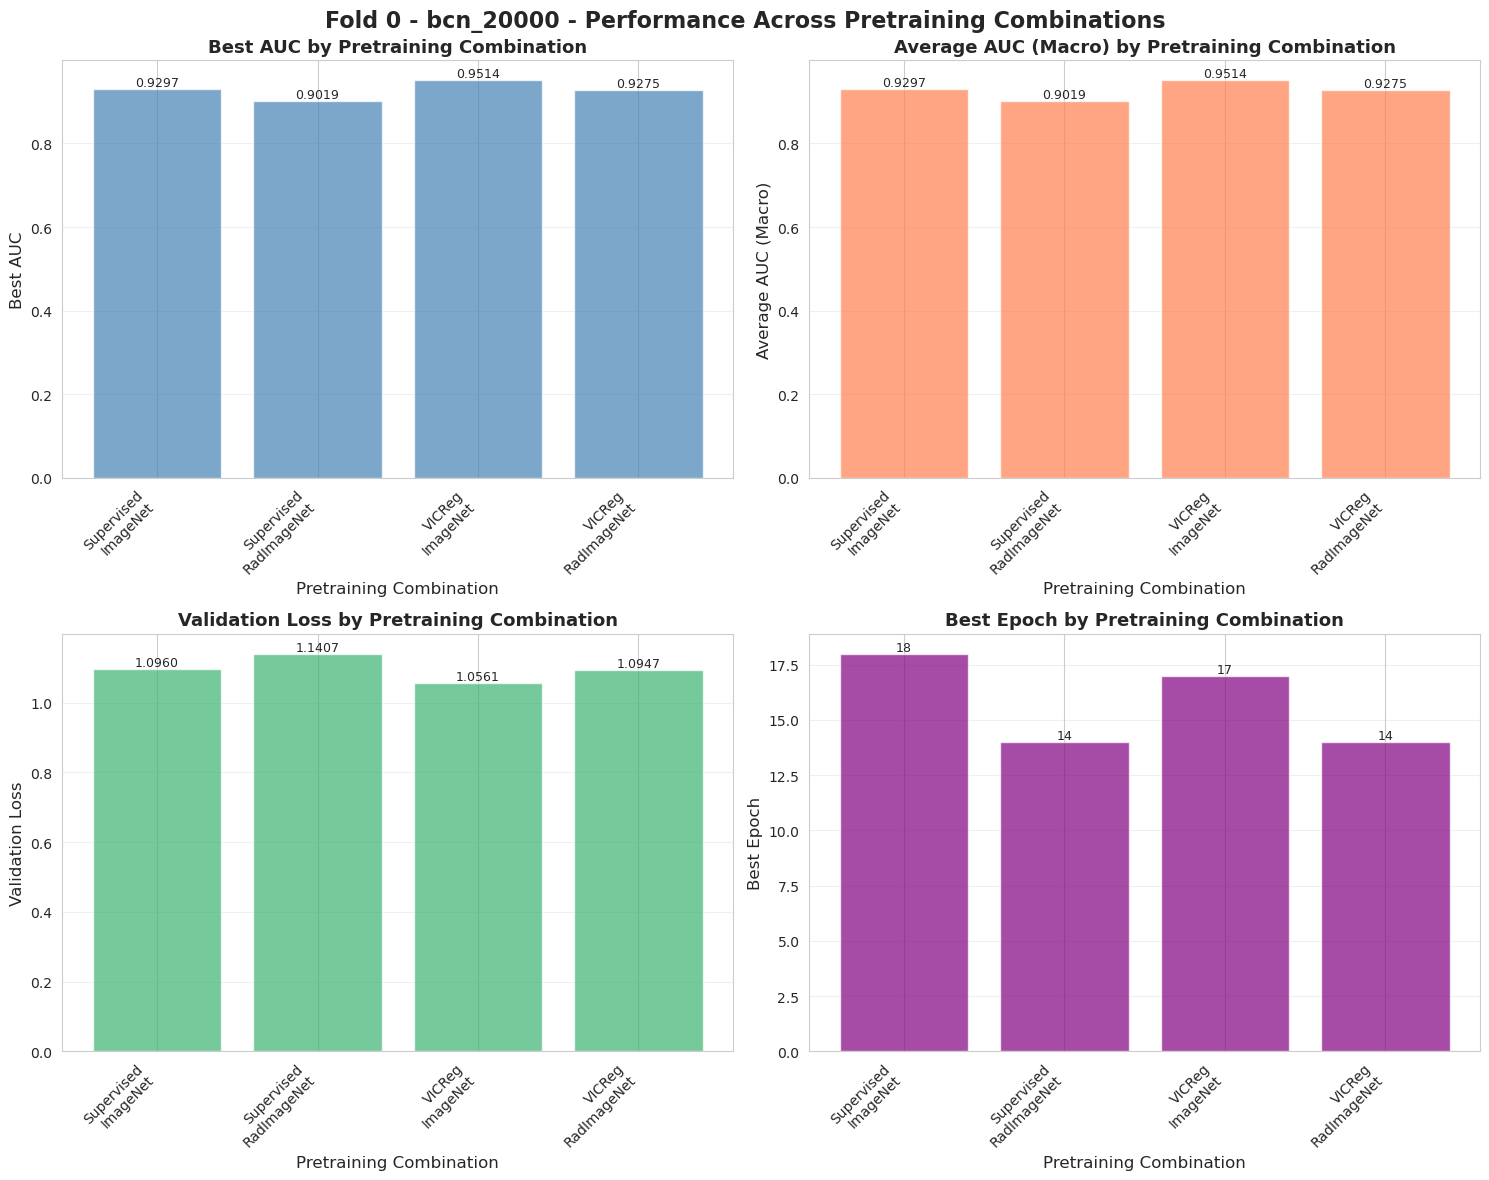


Fold 0 - bcn_20000 Summary
Number of combinations: 4
Best AUC - Min: 0.9019, Max: 0.9514, Mean: 0.9276
Avg AUC (Macro) - Min: 0.9019, Max: 0.9514, Mean: 0.9276
Validation Loss - Min: 1.0561, Max: 1.1407, Mean: 1.0969


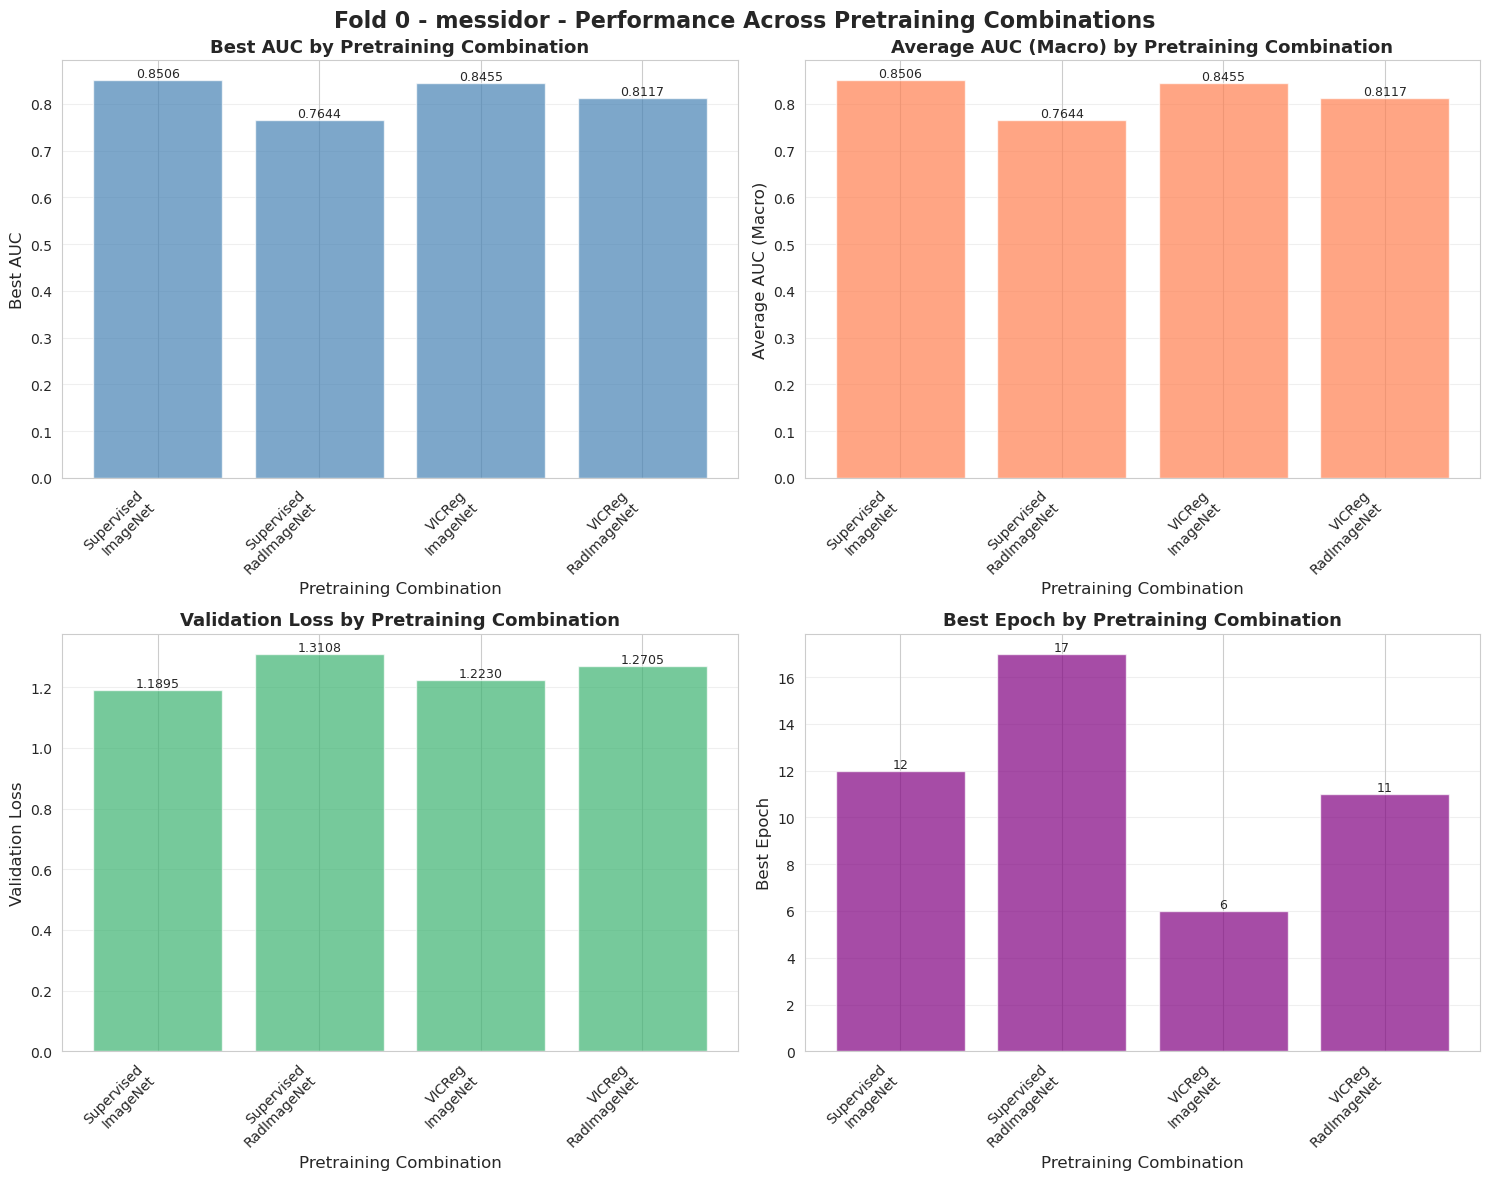


Fold 0 - messidor Summary
Number of combinations: 4
Best AUC - Min: 0.7644, Max: 0.8506, Mean: 0.8181
Avg AUC (Macro) - Min: 0.7644, Max: 0.8506, Mean: 0.8181
Validation Loss - Min: 1.1895, Max: 1.3108, Mean: 1.2484


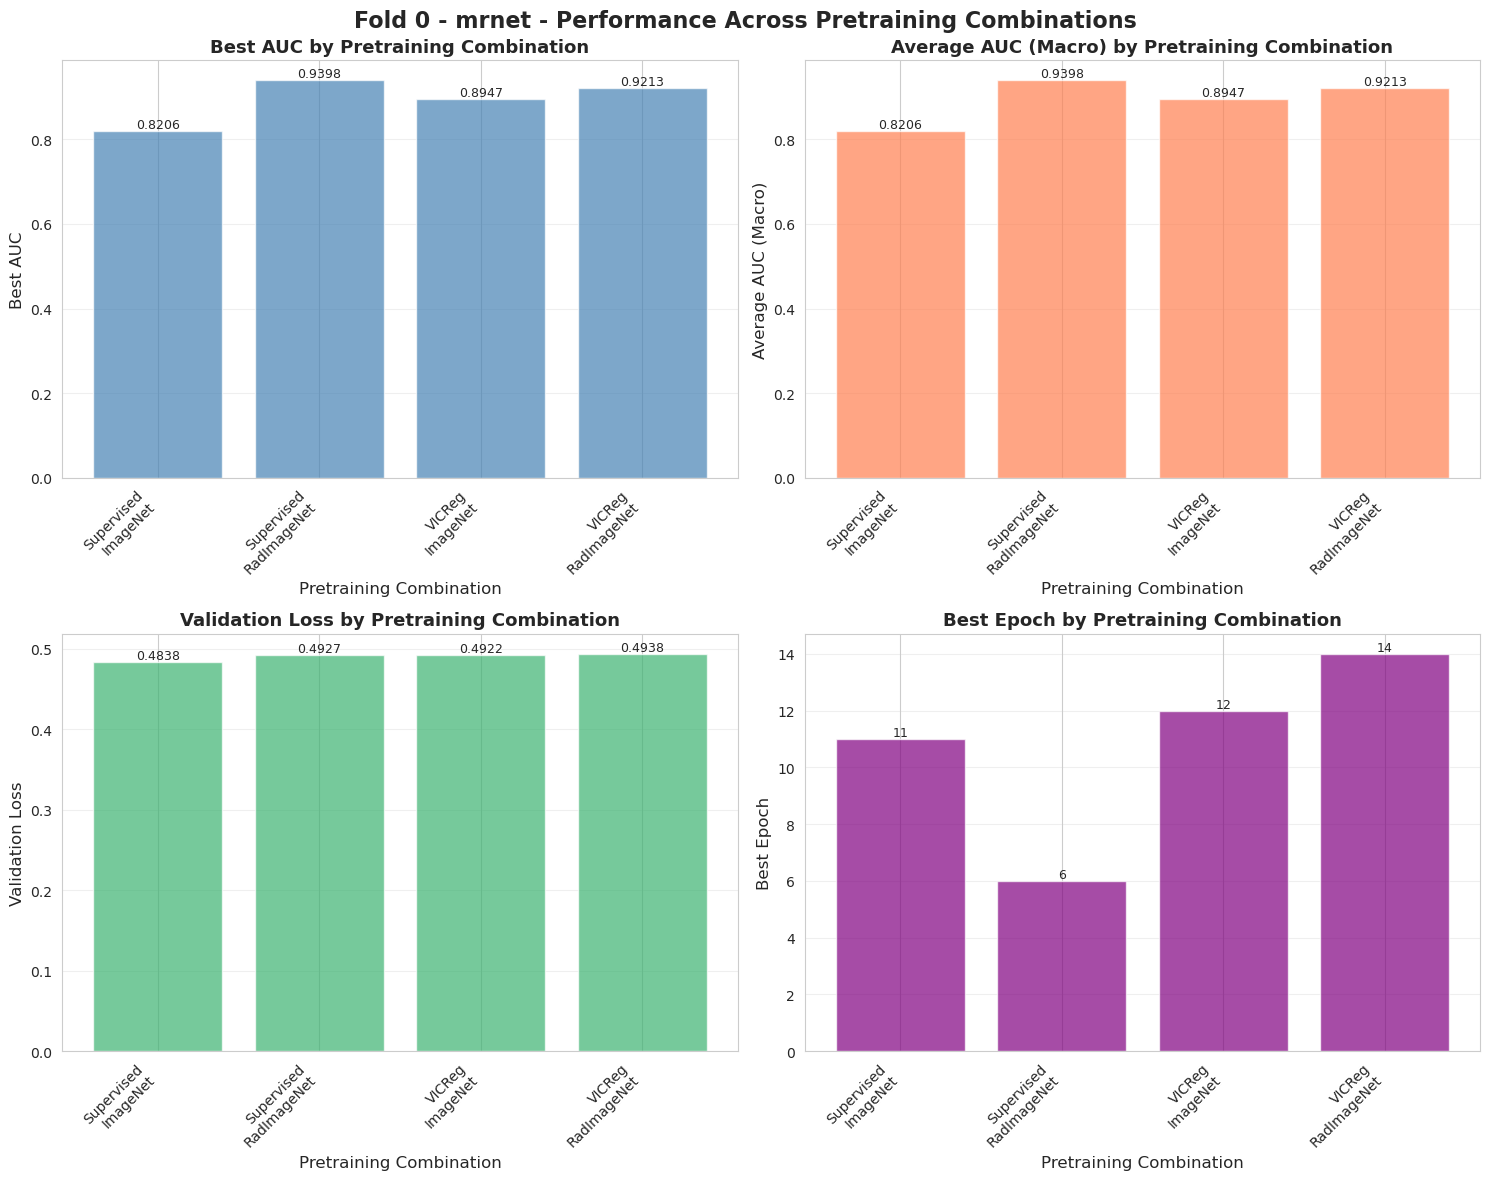


Fold 0 - mrnet Summary
Number of combinations: 4
Best AUC - Min: 0.8206, Max: 0.9398, Mean: 0.8941
Avg AUC (Macro) - Min: 0.8206, Max: 0.9398, Mean: 0.8941
Validation Loss - Min: 0.4838, Max: 0.4938, Mean: 0.4906


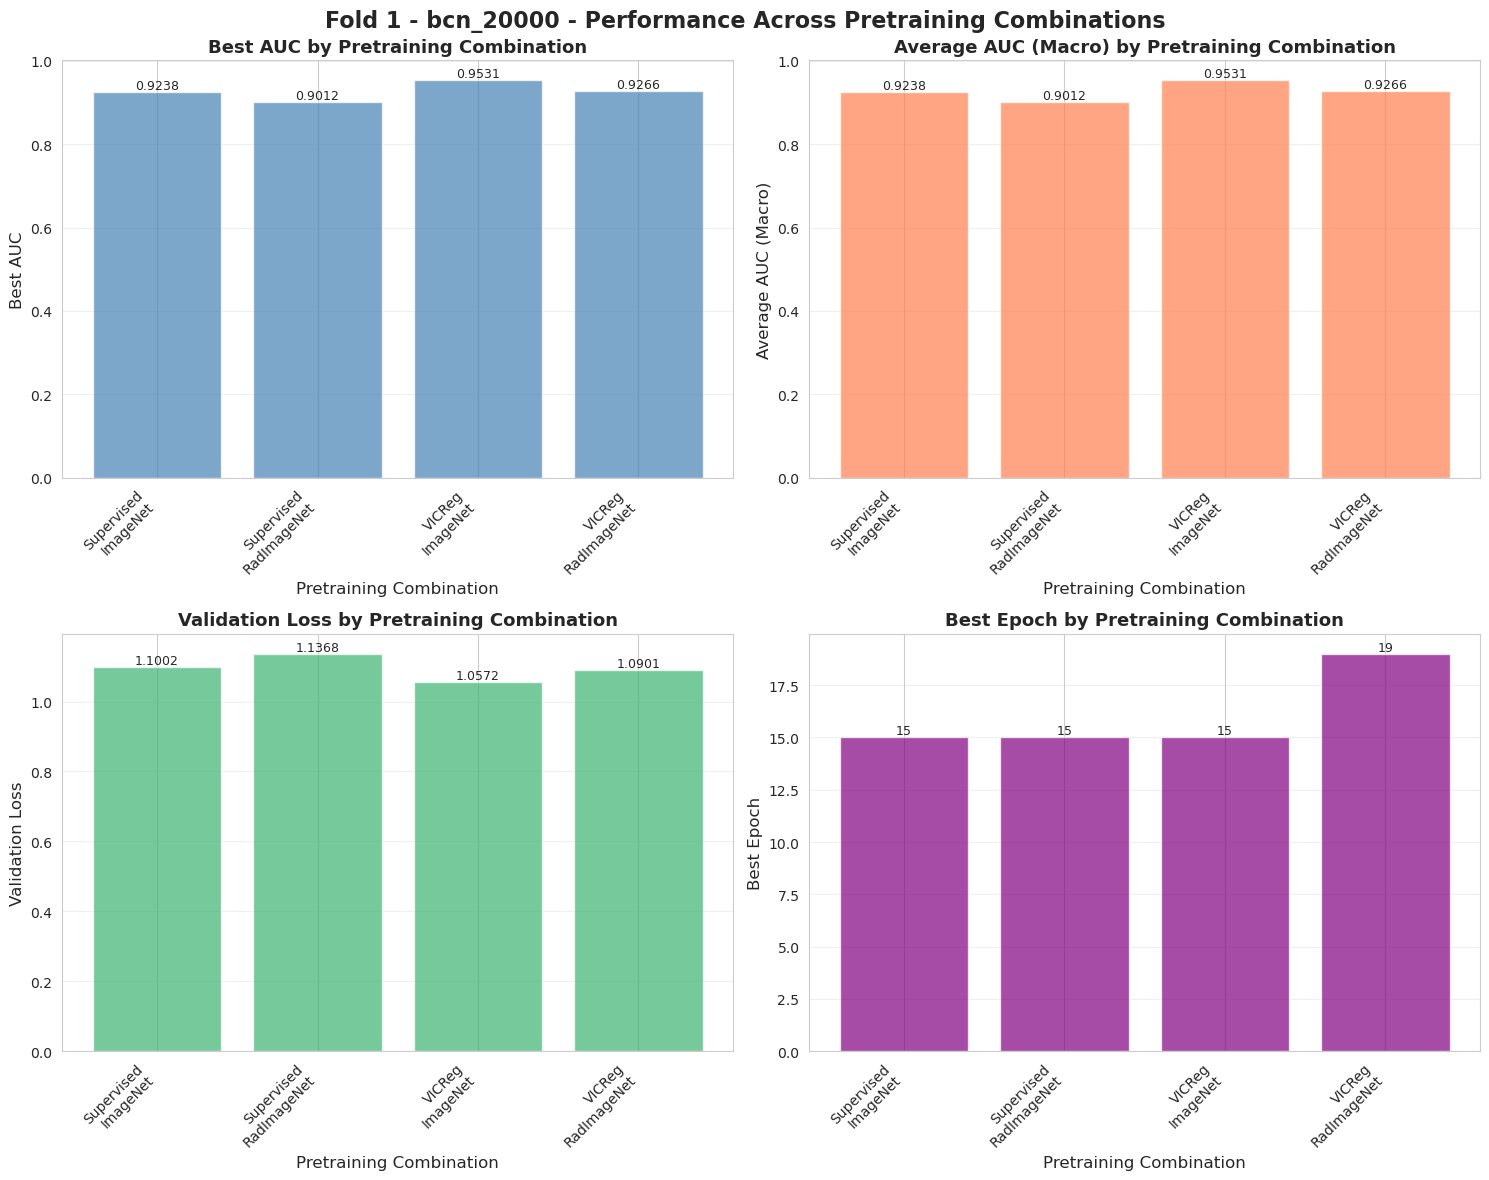


Fold 1 - bcn_20000 Summary
Number of combinations: 4
Best AUC - Min: 0.9012, Max: 0.9531, Mean: 0.9262
Avg AUC (Macro) - Min: 0.9012, Max: 0.9531, Mean: 0.9262
Validation Loss - Min: 1.0572, Max: 1.1368, Mean: 1.0961


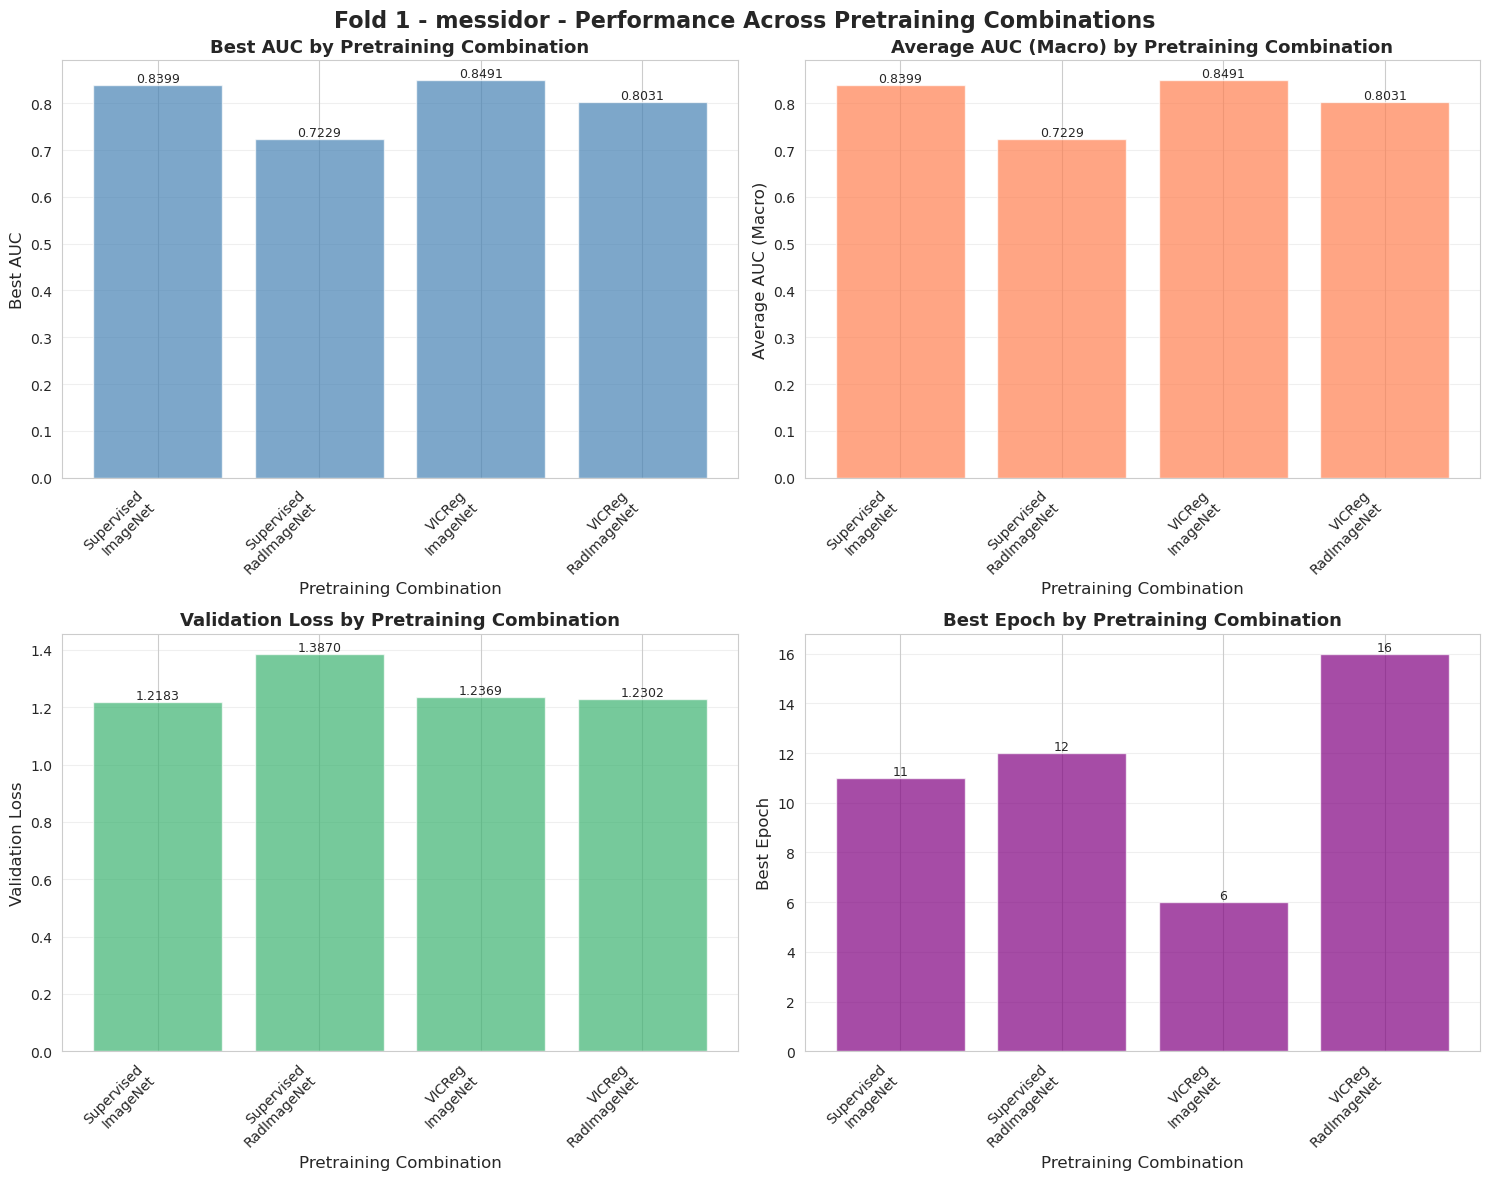


Fold 1 - messidor Summary
Number of combinations: 4
Best AUC - Min: 0.7229, Max: 0.8491, Mean: 0.8037
Avg AUC (Macro) - Min: 0.7229, Max: 0.8491, Mean: 0.8037
Validation Loss - Min: 1.2183, Max: 1.3870, Mean: 1.2681


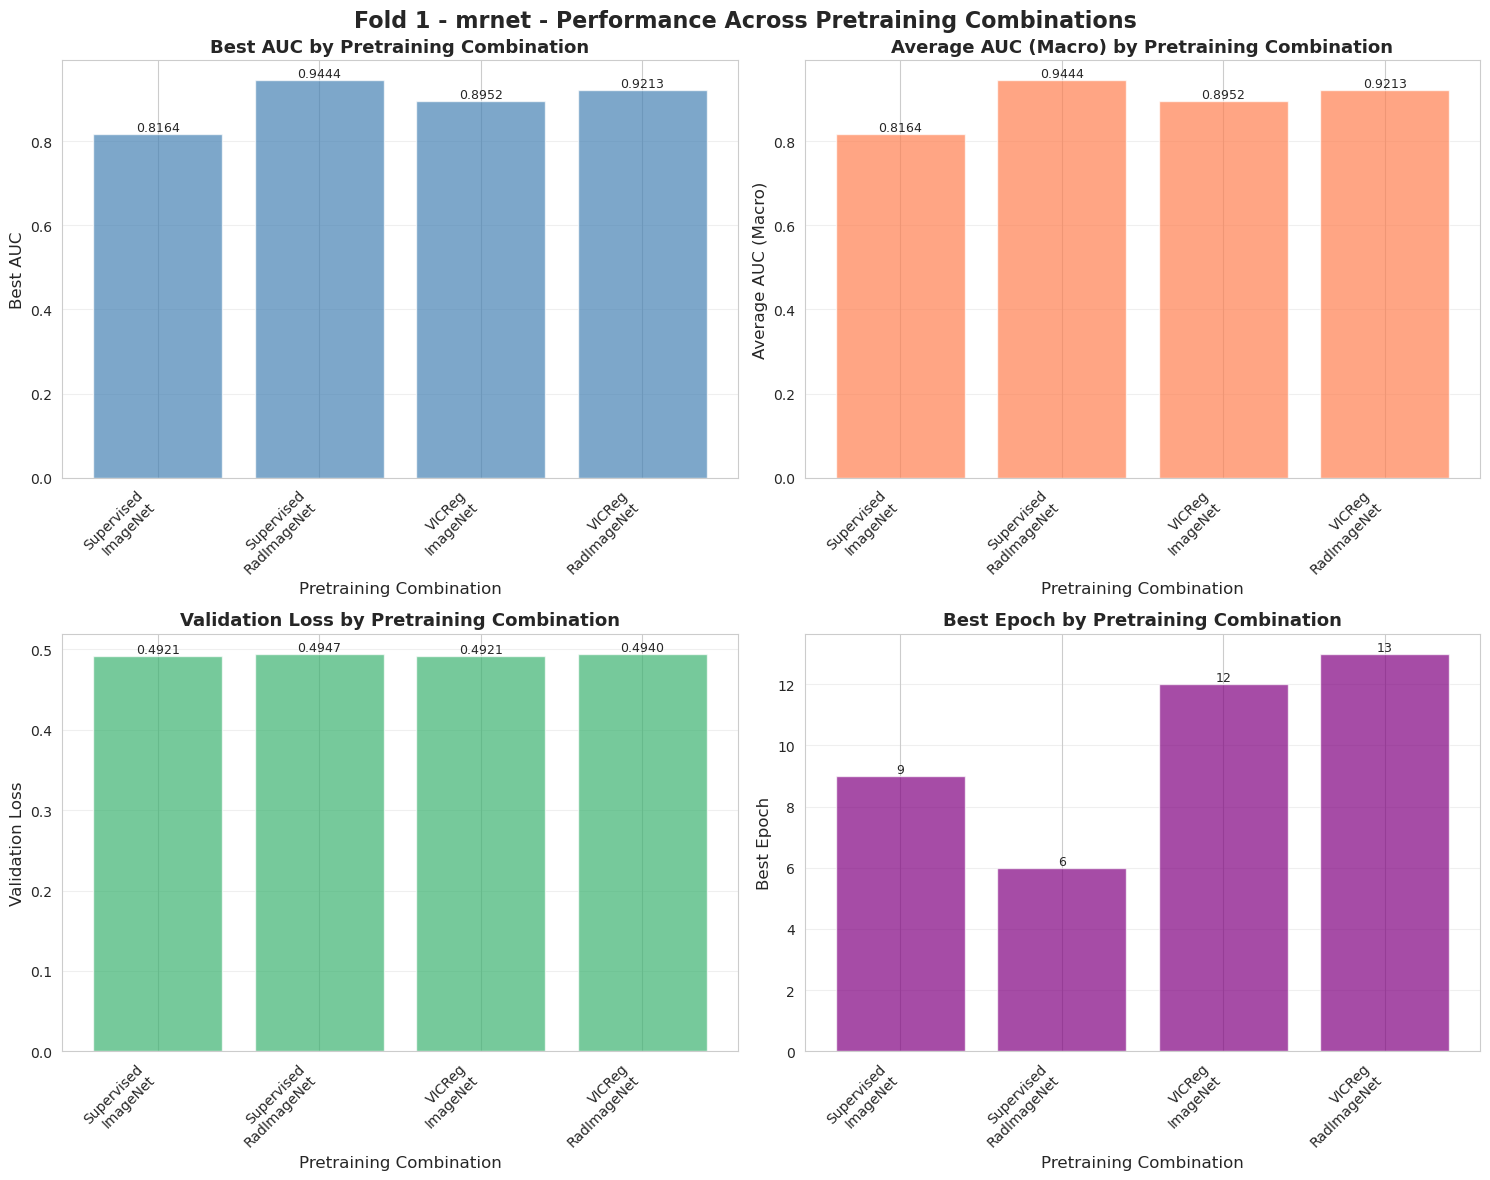


Fold 1 - mrnet Summary
Number of combinations: 4
Best AUC - Min: 0.8164, Max: 0.9444, Mean: 0.8943
Avg AUC (Macro) - Min: 0.8164, Max: 0.9444, Mean: 0.8943
Validation Loss - Min: 0.4921, Max: 0.4947, Mean: 0.4932


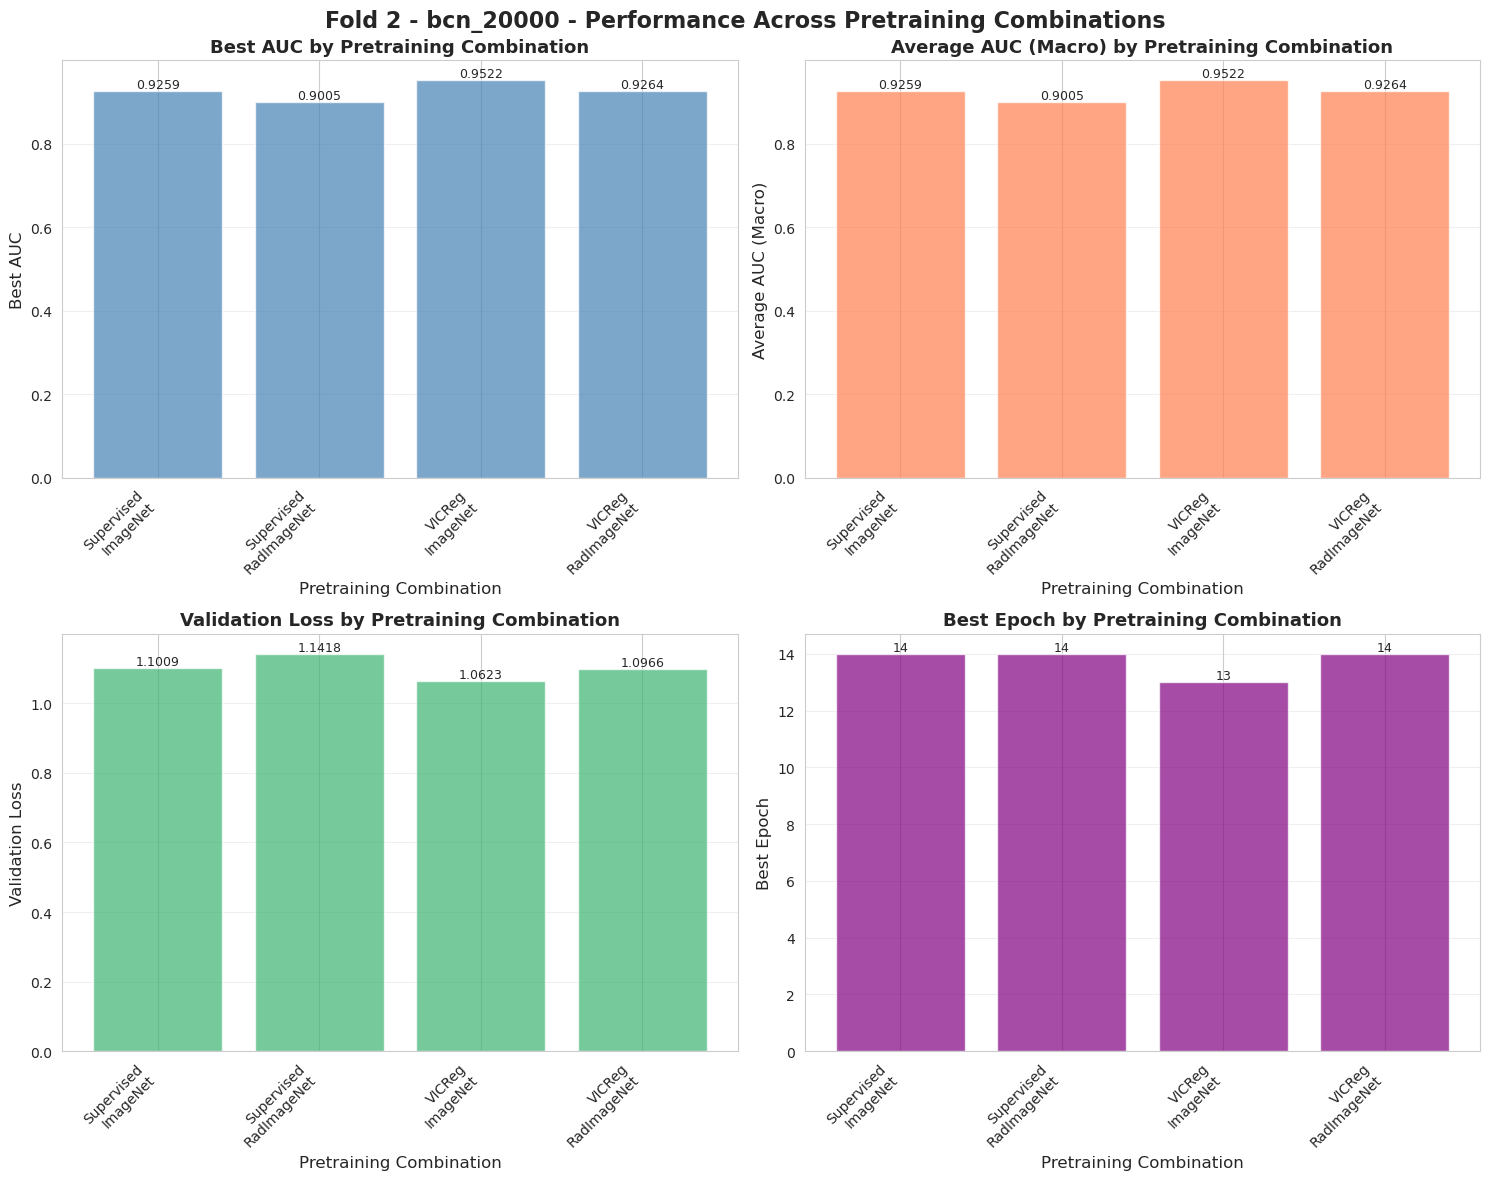


Fold 2 - bcn_20000 Summary
Number of combinations: 4
Best AUC - Min: 0.9005, Max: 0.9522, Mean: 0.9262
Avg AUC (Macro) - Min: 0.9005, Max: 0.9522, Mean: 0.9262
Validation Loss - Min: 1.0623, Max: 1.1418, Mean: 1.1004


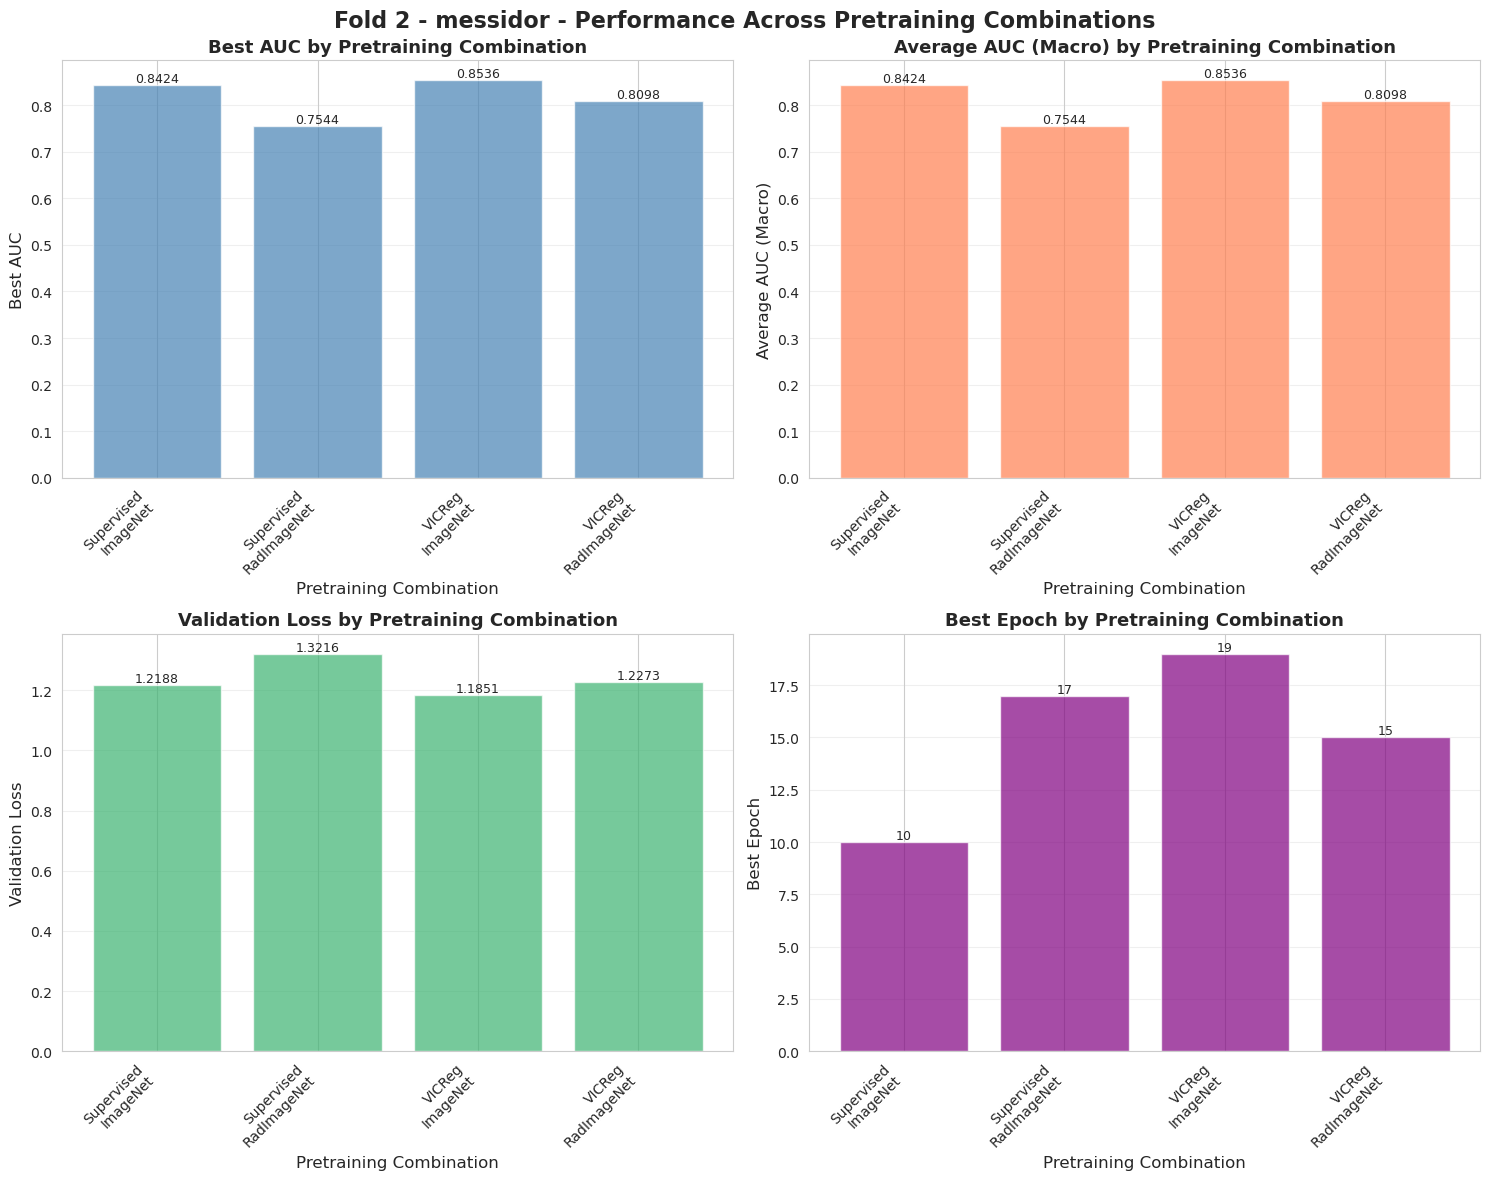


Fold 2 - messidor Summary
Number of combinations: 4
Best AUC - Min: 0.7544, Max: 0.8536, Mean: 0.8150
Avg AUC (Macro) - Min: 0.7544, Max: 0.8536, Mean: 0.8150
Validation Loss - Min: 1.1851, Max: 1.3216, Mean: 1.2382


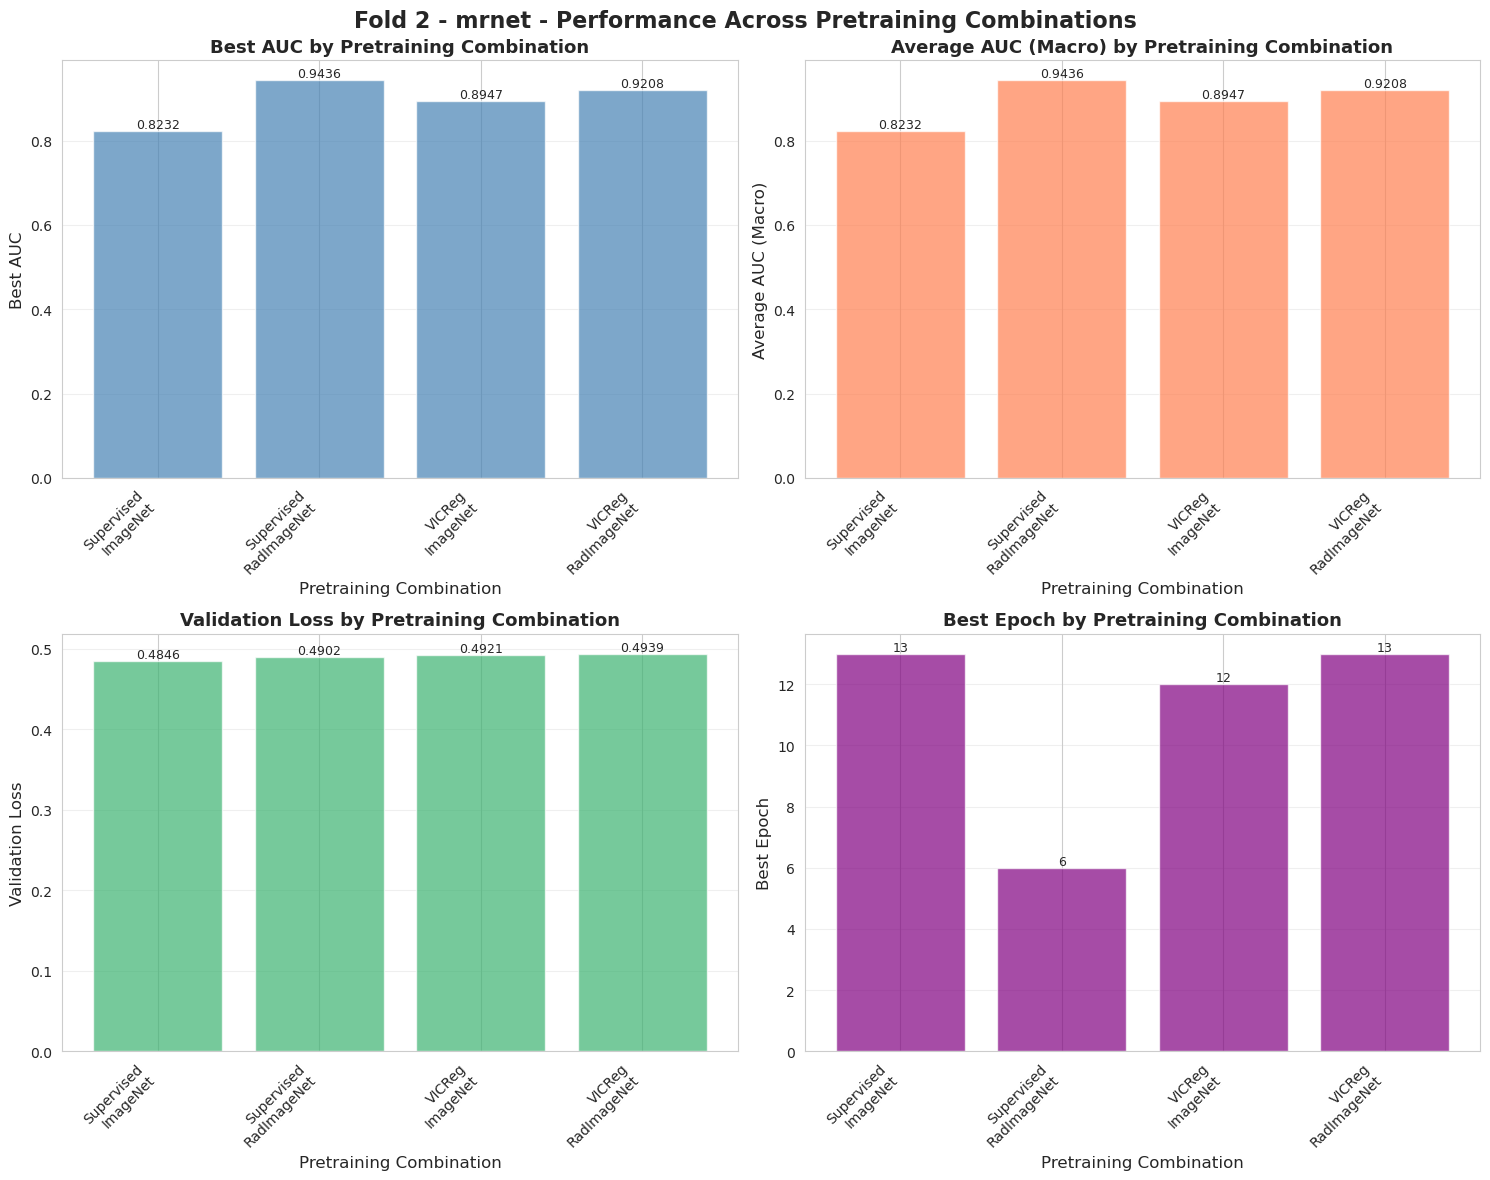


Fold 2 - mrnet Summary
Number of combinations: 4
Best AUC - Min: 0.8232, Max: 0.9436, Mean: 0.8956
Avg AUC (Macro) - Min: 0.8232, Max: 0.9436, Mean: 0.8956
Validation Loss - Min: 0.4846, Max: 0.4939, Mean: 0.4902


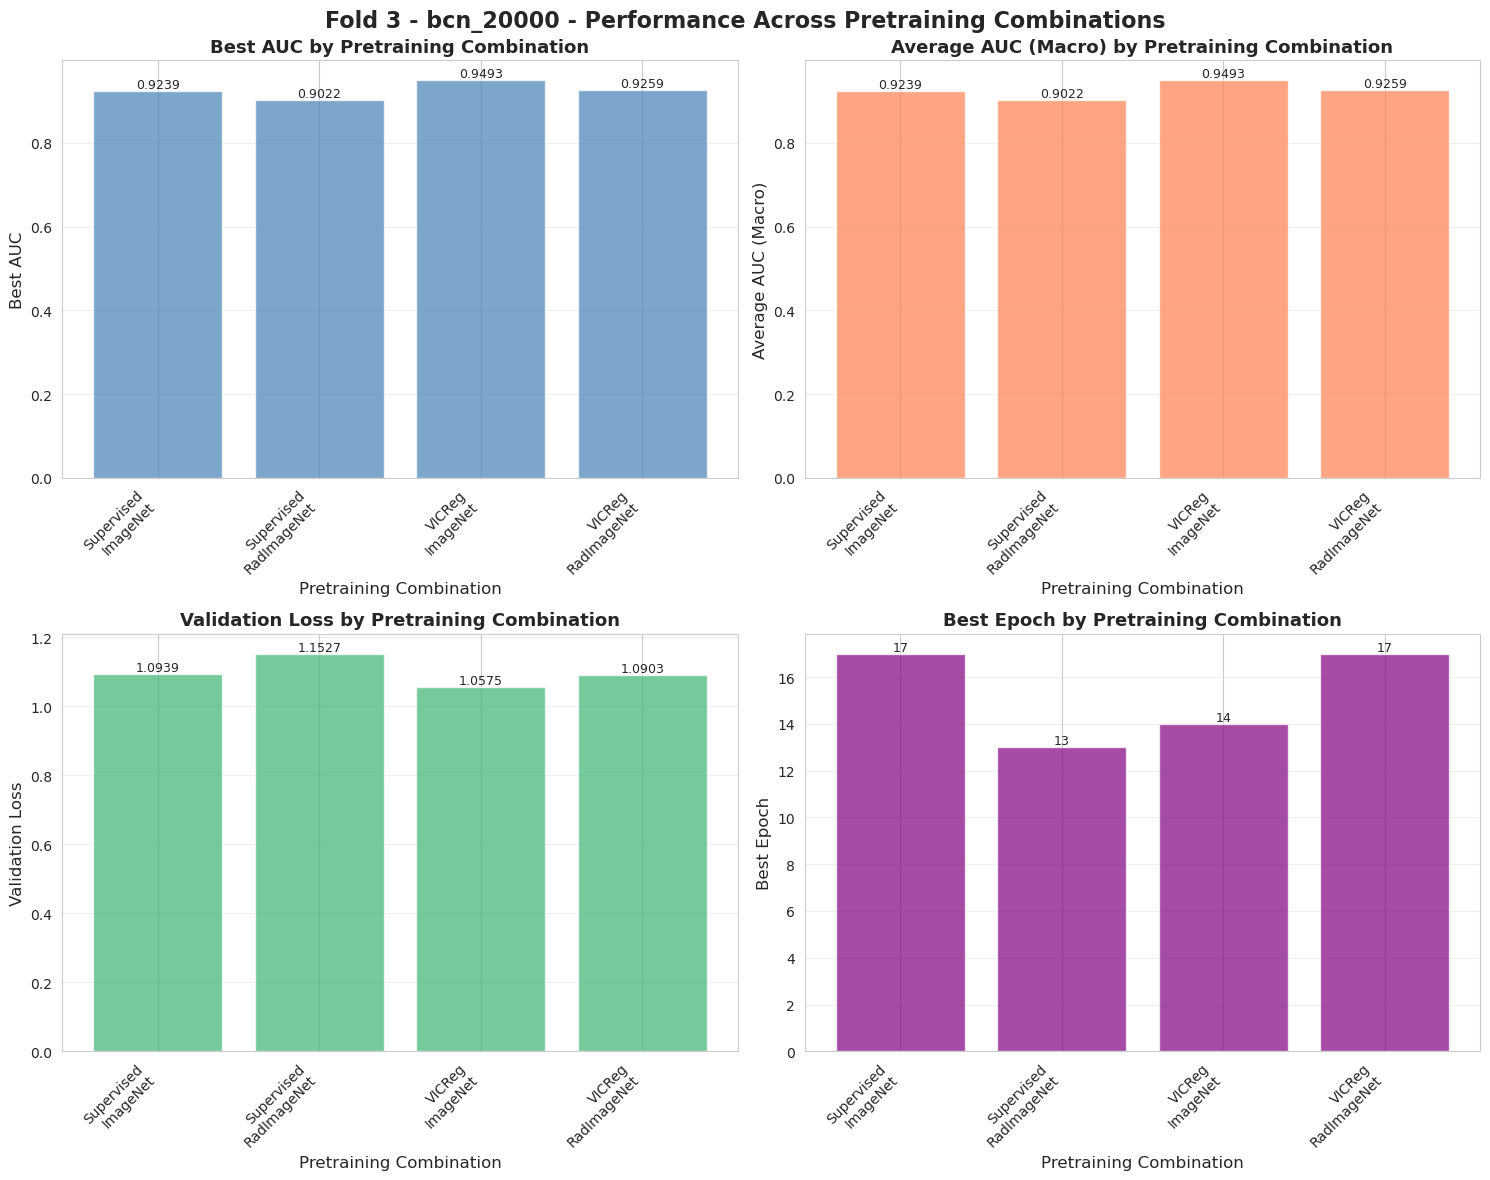


Fold 3 - bcn_20000 Summary
Number of combinations: 4
Best AUC - Min: 0.9022, Max: 0.9493, Mean: 0.9253
Avg AUC (Macro) - Min: 0.9022, Max: 0.9493, Mean: 0.9253
Validation Loss - Min: 1.0575, Max: 1.1527, Mean: 1.0986


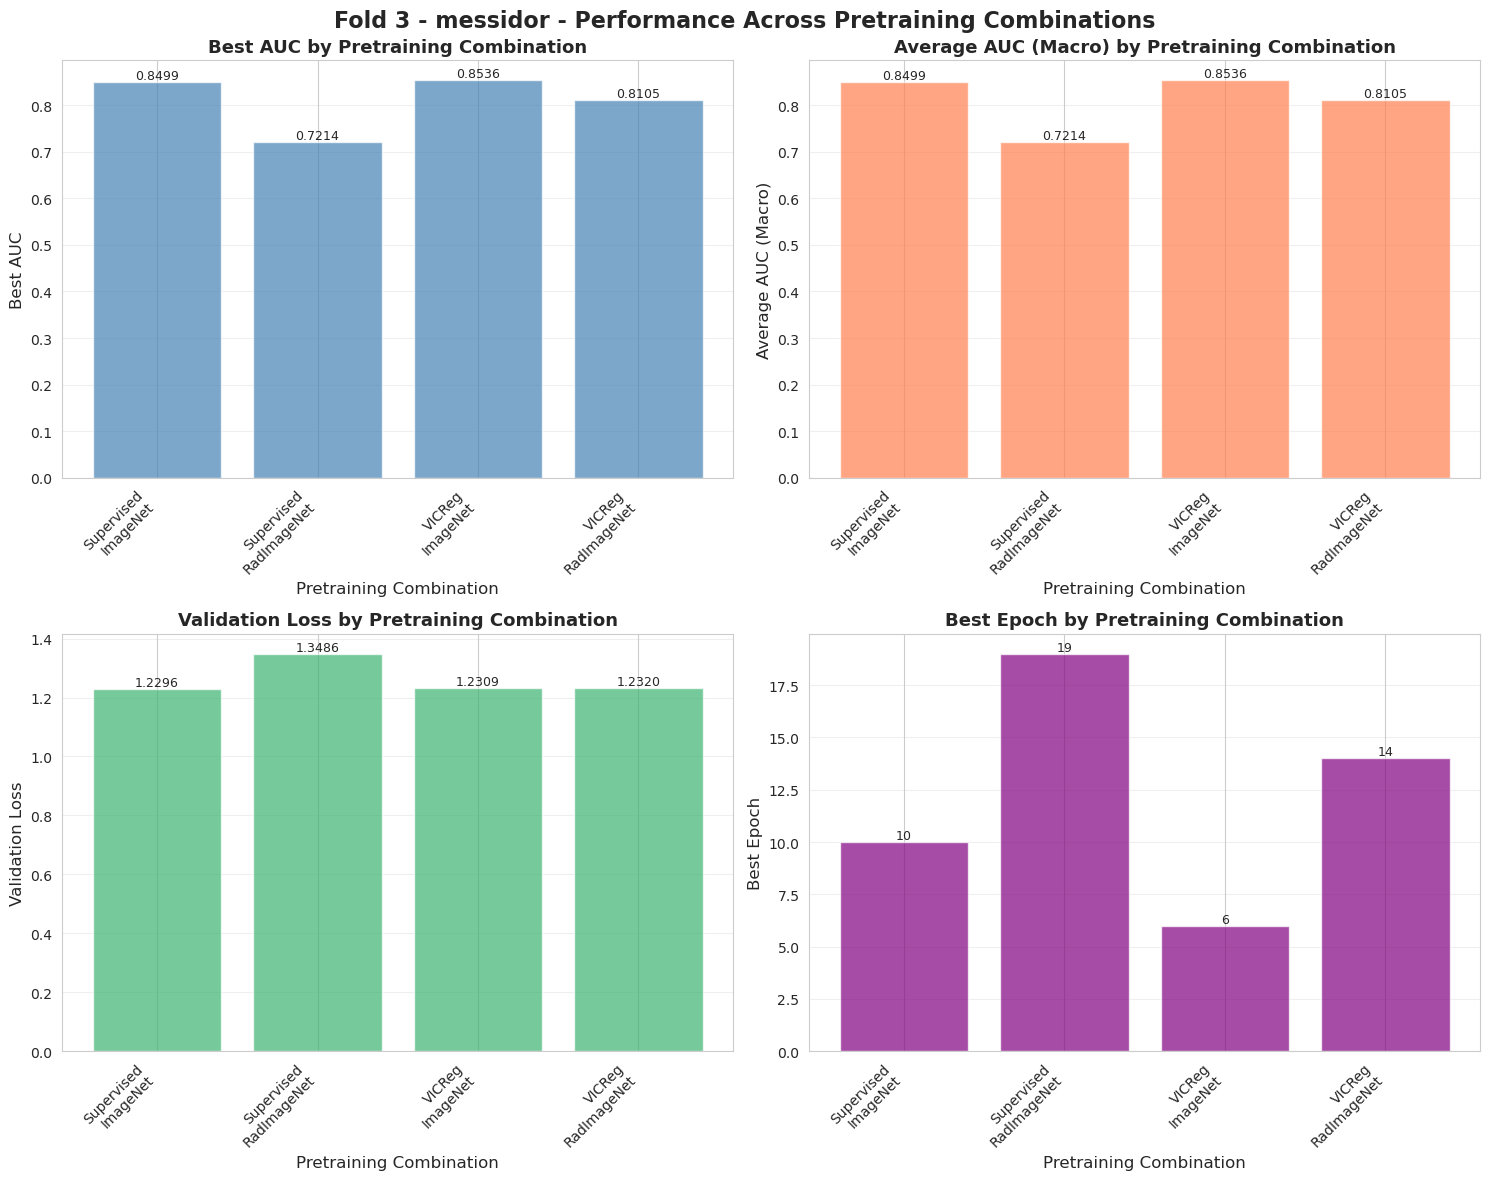


Fold 3 - messidor Summary
Number of combinations: 4
Best AUC - Min: 0.7214, Max: 0.8536, Mean: 0.8089
Avg AUC (Macro) - Min: 0.7214, Max: 0.8536, Mean: 0.8089
Validation Loss - Min: 1.2296, Max: 1.3486, Mean: 1.2603


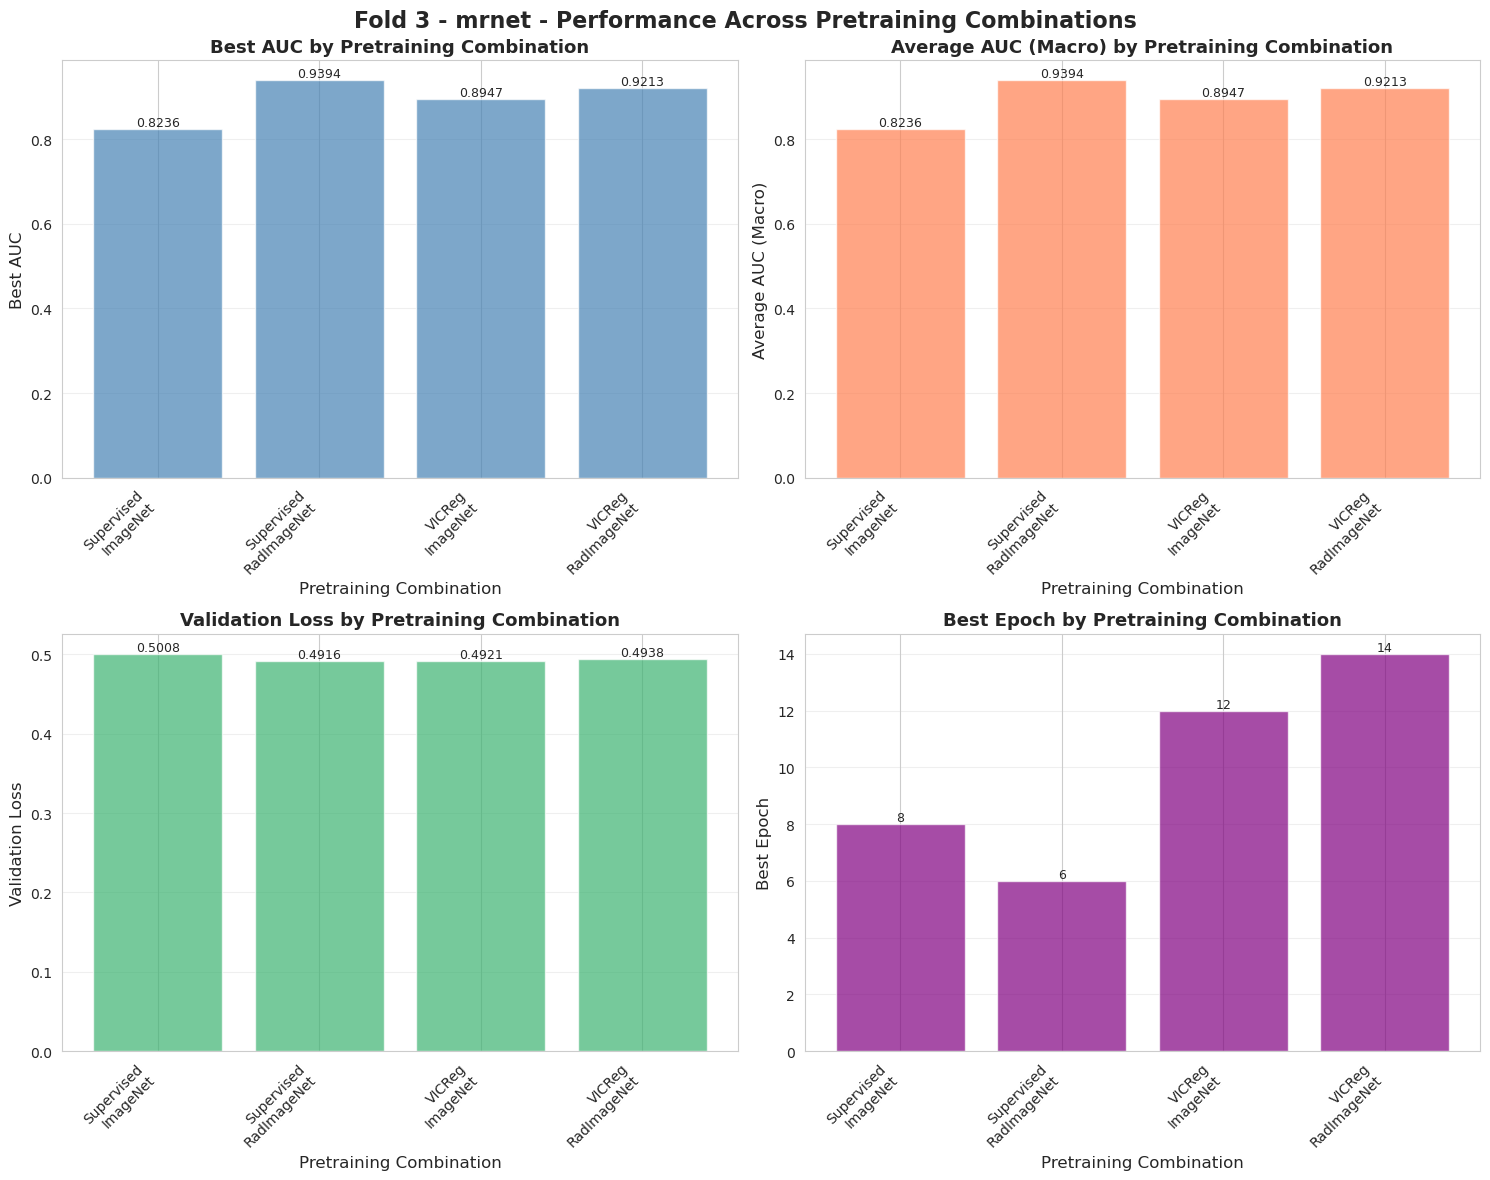


Fold 3 - mrnet Summary
Number of combinations: 4
Best AUC - Min: 0.8236, Max: 0.9394, Mean: 0.8947
Avg AUC (Macro) - Min: 0.8236, Max: 0.9394, Mean: 0.8947
Validation Loss - Min: 0.4916, Max: 0.5008, Mean: 0.4946


In [12]:
# Create graphs for each fold and each task dataset separately
unique_folds = sorted(df['fold'].unique())
unique_task_ds = sorted(df['task_ds'].unique())

print(f"Creating graphs for {len(unique_folds)} folds and {len(unique_task_ds)} task datasets")
print(f"Folds: {unique_folds}")
print(f"Task datasets: {unique_task_ds}")

for fold in unique_folds:
    for task_ds in unique_task_ds:
        # Filter data for this fold and task dataset
        fold_task_data = df[(df['fold'] == fold) & (df['task_ds'] == task_ds)].copy()
        
        # Skip if no data for this combination
        if len(fold_task_data) == 0:
            continue
        
        # Create a label for each combination (pretrained_how and pretrained_dataset)
        fold_task_data['combo_label'] = fold_task_data.apply(
            lambda row: f"{row['pretrained_how']}\n{row['pretrained_dataset']}", 
            axis=1
        )
        
        # Sort by pretrained_how, then pretrained_dataset for consistent ordering
        fold_task_data = fold_task_data.sort_values(['pretrained_how', 'pretrained_dataset'])
        
        # Create figure with subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'Fold {fold} - {task_ds} - Performance Across Pretraining Combinations', 
                     fontsize=16, fontweight='bold')
        
        # Plot 1: Best AUC across combinations
        x_pos = np.arange(len(fold_task_data))
        axes[0, 0].bar(x_pos, fold_task_data['best_auc'], color='steelblue', alpha=0.7)
        axes[0, 0].set_xlabel('Pretraining Combination', fontsize=12)
        axes[0, 0].set_ylabel('Best AUC', fontsize=12)
        axes[0, 0].set_title('Best AUC by Pretraining Combination', fontsize=13, fontweight='bold')
        axes[0, 0].set_xticks(x_pos)
        axes[0, 0].set_xticklabels(fold_task_data['combo_label'], rotation=45, ha='right', fontsize=10)
        axes[0, 0].grid(axis='y', alpha=0.3)
        # Add value labels on bars
        for i, v in enumerate(fold_task_data['best_auc']):
            axes[0, 0].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=9)
        
        # Plot 2: Average AUC (macro) across combinations
        axes[0, 1].bar(x_pos, fold_task_data['avg_auc_macro'], color='coral', alpha=0.7)
        axes[0, 1].set_xlabel('Pretraining Combination', fontsize=12)
        axes[0, 1].set_ylabel('Average AUC (Macro)', fontsize=12)
        axes[0, 1].set_title('Average AUC (Macro) by Pretraining Combination', fontsize=13, fontweight='bold')
        axes[0, 1].set_xticks(x_pos)
        axes[0, 1].set_xticklabels(fold_task_data['combo_label'], rotation=45, ha='right', fontsize=10)
        axes[0, 1].grid(axis='y', alpha=0.3)
        # Add value labels on bars
        for i, v in enumerate(fold_task_data['avg_auc_macro']):
            axes[0, 1].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=9)
        
        # Plot 3: Validation Loss across combinations
        axes[1, 0].bar(x_pos, fold_task_data['validation_loss'], color='mediumseagreen', alpha=0.7)
        axes[1, 0].set_xlabel('Pretraining Combination', fontsize=12)
        axes[1, 0].set_ylabel('Validation Loss', fontsize=12)
        axes[1, 0].set_title('Validation Loss by Pretraining Combination', fontsize=13, fontweight='bold')
        axes[1, 0].set_xticks(x_pos)
        axes[1, 0].set_xticklabels(fold_task_data['combo_label'], rotation=45, ha='right', fontsize=10)
        axes[1, 0].grid(axis='y', alpha=0.3)
        # Add value labels on bars
        for i, v in enumerate(fold_task_data['validation_loss']):
            axes[1, 0].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=9)
        
        # Plot 4: Best Epoch across combinations
        axes[1, 1].bar(x_pos, fold_task_data['best_epoch'], color='purple', alpha=0.7)
        axes[1, 1].set_xlabel('Pretraining Combination', fontsize=12)
        axes[1, 1].set_ylabel('Best Epoch', fontsize=12)
        axes[1, 1].set_title('Best Epoch by Pretraining Combination', fontsize=13, fontweight='bold')
        axes[1, 1].set_xticks(x_pos)
        axes[1, 1].set_xticklabels(fold_task_data['combo_label'], rotation=45, ha='right', fontsize=10)
        axes[1, 1].grid(axis='y', alpha=0.3)
        # Add value labels on bars
        for i, v in enumerate(fold_task_data['best_epoch']):
            axes[1, 1].text(i, v, f'{int(v)}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        # Print summary for this fold and task dataset
        print(f"\n{'='*60}")
        print(f"Fold {fold} - {task_ds} Summary")
        print(f"{'='*60}")
        print(f"Number of combinations: {len(fold_task_data)}")
        print(f"Best AUC - Min: {fold_task_data['best_auc'].min():.4f}, Max: {fold_task_data['best_auc'].max():.4f}, Mean: {fold_task_data['best_auc'].mean():.4f}")
        print(f"Avg AUC (Macro) - Min: {fold_task_data['avg_auc_macro'].min():.4f}, Max: {fold_task_data['avg_auc_macro'].max():.4f}, Mean: {fold_task_data['avg_auc_macro'].mean():.4f}")
        print(f"Validation Loss - Min: {fold_task_data['validation_loss'].min():.4f}, Max: {fold_task_data['validation_loss'].max():.4f}, Mean: {fold_task_data['validation_loss'].mean():.4f}")


In [ ]:
# Calculate confidence intervals for best AUC across all folds for each approach and task dataset
from scipy import stats

# Group by pretrained_how, pretrained_dataset, and task_ds
grouped = df.groupby(['pretrained_how', 'pretrained_dataset', 'task_ds'])

# Calculate statistics for each group
results = []

for (pretrained_how, pretrained_dataset, task_ds), group in grouped:
    best_aucs = group['best_auc'].values
    
    if len(best_aucs) < 2:
        # Need at least 2 samples for CI calculation
        results.append({
            'pretrained_how': pretrained_how,
            'pretrained_dataset': pretrained_dataset,
            'task_ds': task_ds,
            'n_folds': len(best_aucs),
            'mean': best_aucs[0] if len(best_aucs) == 1 else np.nan,
            'std': 0.0 if len(best_aucs) == 1 else np.nan,
            'ci_lower': best_aucs[0] if len(best_aucs) == 1 else np.nan,
            'ci_upper': best_aucs[0] if len(best_aucs) == 1 else np.nan,
            'ci_95': f"[{best_aucs[0]:.4f}, {best_aucs[0]:.4f}]" if len(best_aucs) == 1 else "N/A"
        })
    else:
        # Calculate 95% confidence interval using t-distribution
        mean_auc = np.mean(best_aucs)
        std_auc = np.std(best_aucs, ddof=1)  # Sample standard deviation
        n = len(best_aucs)
        
        # t-value for 95% confidence interval (two-tailed)
        t_critical = stats.t.ppf(0.975, df=n-1)
        
        # Standard error
        se = std_auc / np.sqrt(n)
        
        # Confidence interval
        ci_lower = mean_auc - t_critical * se
        ci_upper = mean_auc + t_critical * se
        
        results.append({
            'pretrained_how': pretrained_how,
            'pretrained_dataset': pretrained_dataset,
            'task_ds': task_ds,
            'n_folds': n,
            'mean': mean_auc,
            'std': std_auc,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'ci_95': f"[{ci_lower:.4f}, {ci_upper:.4f}]"
        })

# Create DataFrame from results
ci_df = pd.DataFrame(results)

# Sort by task_ds, pretrained_how, pretrained_dataset
ci_df = ci_df.sort_values(['task_ds', 'pretrained_how', 'pretrained_dataset'])

# Display the results
print("="*80)
print("95% Confidence Intervals for Best AUC (across all folds)")
print("="*80)
print()

for task_ds in sorted(ci_df['task_ds'].unique()):
    task_data = ci_df[ci_df['task_ds'] == task_ds]
    print(f"\n{'='*80}")
    print(f"Task Dataset: {task_ds}")
    print(f"{'='*80}")
    print(f"{'Approach':<15} {'Pretrained Dataset':<18} {'Mean':<10} {'Std':<10} {'95% CI':<25} {'N Folds':<10}")
    print("-"*80)
    
    for _, row in task_data.iterrows():
        print(f"{row['pretrained_how']:<15} {row['pretrained_dataset']:<18} "
              f"{row['mean']:<10.4f} {row['std']:<10.4f} {row['ci_95']:<25} {int(row['n_folds']):<10}")

# Also create a summary table
print("\n\n" + "="*80)
print("Summary Table")
print("="*80)
print(ci_df[['pretrained_how', 'pretrained_dataset', 'task_ds', 'mean', 'std', 'ci_95', 'n_folds']].to_string(index=False))


NameError: name 'df' is not defined